In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import folium
import seaborn as sns

In [59]:
df = pd.read_csv('D:\DataSci\Resources\historical_automobile_sales.csv')
df.head(15)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
5,6/30/1980,1980,Jun,1,105.55,0.75,23829.315,2573,5,20.298,-1.610947,2.9,754.5,Mediumfamilycar,Illinois
6,7/31/1980,1980,Jul,1,82.45,0.50,32896.064,2828,3,34.585,0.413098,2.9,729.6,Supperminicar,Illinois
7,8/31/1980,1980,Aug,1,98.76,0.25,28837.174,2917,3,55.650,0.378527,3.0,734.9,Supperminicar,New York
8,9/30/1980,1980,Sep,1,87.68,0.07,22652.628,1138,3,33.308,-0.670770,5.2,705.6,Smallfamiliycar,California
9,10/31/1980,1980,Oct,1,101.45,0.00,27712.800,4582,5,42.522,0.216688,4.4,609.7,Smallfamiliycar,New York


In [9]:
df.dtypes
df['Year'].unique()

array([1980, 1981, 1982, 1983, 1990, 1991, 1992, 2000, 2001, 2002, 2008,
       2009, 2020, 1984, 1985, 1986, 1987, 1988, 1989, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2003, 2004, 2005, 2006, 2007, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023],
      dtype=int64)

## Q1

In [ ]:
df_q1 = df.groupby('Year')['Automobile_Sales'].sum().reset_index()
df_q1.plot(x='Year', figsize=(15,15))
plt.title('Automobile Sales vs Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(range(1980,2024), rotation=90)
plt.xlim(1980)
plt.annotate('Recession Year', xytext=(2018,40000), xy=(2023,25000), arrowprops=dict(facecolor='black'))
plt.show()

## Q2

In [ ]:
# Assuming 'df' is your dataset
df_rec = df[df['Recession'] == 1]

# Calculate the average automobile sales by year and vehicle type during the recession
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Calculate the normalized sales by dividing by the average sales for each vehicle type
df_Mline['Normalized_Sales'] = df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x / x.mean())

# Set the 'Year' as the index
df_Mline.set_index('Year', inplace=True)

# Create the plot for each vehicle type
plt.figure(figsize=(12, 8))
for vehicle_type in df_Mline['Vehicle_Type'].unique():
    data = df_Mline[df_Mline['Vehicle_Type'] == vehicle_type]
    plt.plot(data.index, data['Normalized_Sales'], label=vehicle_type, marker='o')

# Highlight recession years
recession_years = df_rec['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)

# Add labels, legend, and title
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Normalized Sales")
plt.xlabel("Year")
plt.title("Normalized Automobile Sales by Vehicle Type During Recession")

# Show the plot
plt.tight_layout()
plt.show()

In [36]:
df.head(5)
df_q3 = df.groupby(['Year','Vehicle_Type','Recession'])['Automobile_Sales'].sum().reset_index()
df_q3

,Year,Vehicle_Type,Recession,Automobile_Sales
0,1980,Mediumfamilycar,1,2882.5
1,1980,Smallfamiliycar,1,2085.7
2,1980,Supperminicar,1,3179.2
3,1981,Mediumfamilycar,1,1885.2
4,1981,Smallfamiliycar,1,3192.1
...,...,...,...,...
195,2022,Sports,0,4596.5
196,2023,Executivecar,0,1579.6
197,2023,Smallfamiliycar,0,10658.5
198,2023,Sports,0,12401.0


In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(df_q3, x='Year', y='Automobile_Sales', hue='Vehicle_Type')
plt.title('Sales per Vehicle Type during Years')
plt.xticks(df['Year'].unique(), rotation=90)
for year in recession_years:
    plt.axvline(x=year,color='gray', linestyle='--', alpha=0.5 )
plt.show()

In [39]:
recession_years

array([1980, 1981, 1982, 1983, 1990, 1991, 1992, 2000, 2001, 2002, 2008,
       2009, 2020], dtype=int64)

In [ ]:
# Filter the data for recessionary periods
recession_data = df[df['Recession'] == 1]

dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

    # Calculate the total sales volume by vehicle type during recessions
    #sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

    # Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('State of Recession')
#plt.ylabel('..............')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

In [ ]:
df_rec = df.loc[df['Recession']==1]
df_nonrec = df.loc[df['Recession']==0]
fig = plt.figure(figsize=(12,6))
ax0= fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_rec.plot(kind='line', ax=ax0, x='Year', y='GDP', title='Recession Period GDP')
df_nonrec.plot(kind='line', ax=ax1, x='Year', y='GDP', title='Non Recession Period GDP')


In [ ]:
sns.scatterplot(data=df.loc[df['Recession']==0], x='Month', y='Automobile_Sales', size='Seasonality_Weight' )
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

In [ ]:
plt.scatter(data=df.loc[df['Recession']==1], x='Consumer_Confidence', y='Automobile_Sales')

In [ ]:
plt.scatter(data=df.loc[df['Recession']==1], x='Price', y='Automobile_Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.xlabel('Average Vehicle Price')
plt.ylabel('Sales')
plt.show()

In [62]:
df_q7 = df.groupby('Recession')['Advertising_Expenditure'].sum().reset_index()
df_q7

,Recession,Advertising_Expenditure
0,0,1279707
1,1,339910


In [ ]:
plt.figure(figsize=(10,10))
plt.pie(df_q7['Advertising_Expenditure'], labels=['Non-Recession', 'Recession'], autopct='%1.1f%%')
plt.title('Advertising expenditure of XYZAutomotives change during recession and non-recession periods')
plt.show()

In [73]:
rec_data = df.loc[df['Recession']==1].groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
rec_data

,Vehicle_Type,Advertising_Expenditure
0,Executivecar,3243
1,Mediumfamilycar,130612
2,Smallfamiliycar,102759
3,Sports,12568
4,Supperminicar,90728


([<matplotlib.patches.Wedge at 0x1dcb3691490>,
 [Text(1.0995059215132592, 0.0329655662362888, 'Executivecar'),
  Text(0.3289354645894119, 1.0496673092629625, 'Mediumfamilycar'),
  Text(-1.056416309241773, -0.3065690486138327, 'Smallfamiliycar'),
  Text(-0.24268822252961425, -1.072894415422793, 'Sports'),
  Text(0.7353987295984742, -0.8180395519196797, 'Supperminicar')],
 [Text(0.5997305026435958, 0.017981217947066617, '1.0%'),
  Text(0.1794193443214974, 0.572545805052525, '38.4%'),
  Text(-0.5762270777682398, -0.16721948106209056, '30.2%'),
  Text(-0.1323753941070623, -0.5852151356851597, '3.7%'),
  Text(0.4011265797809859, -0.44620339195618886, '26.7%')])

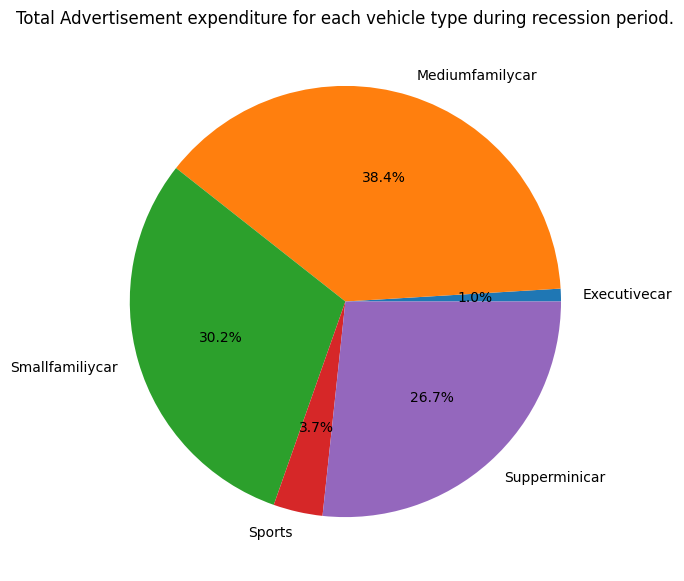

In [79]:
plt.figure(figsize=(7,7))
plt.title('Total Advertisement expenditure for each vehicle type during recession period.')
plt.pie(x=rec_data['Advertising_Expenditure'], labels=rec_data['Vehicle_Type'], autopct='%1.1f%%')

C:\Users\Ojas\AppData\Local\Temp\ipykernel_13000\3906415084.py:3: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',


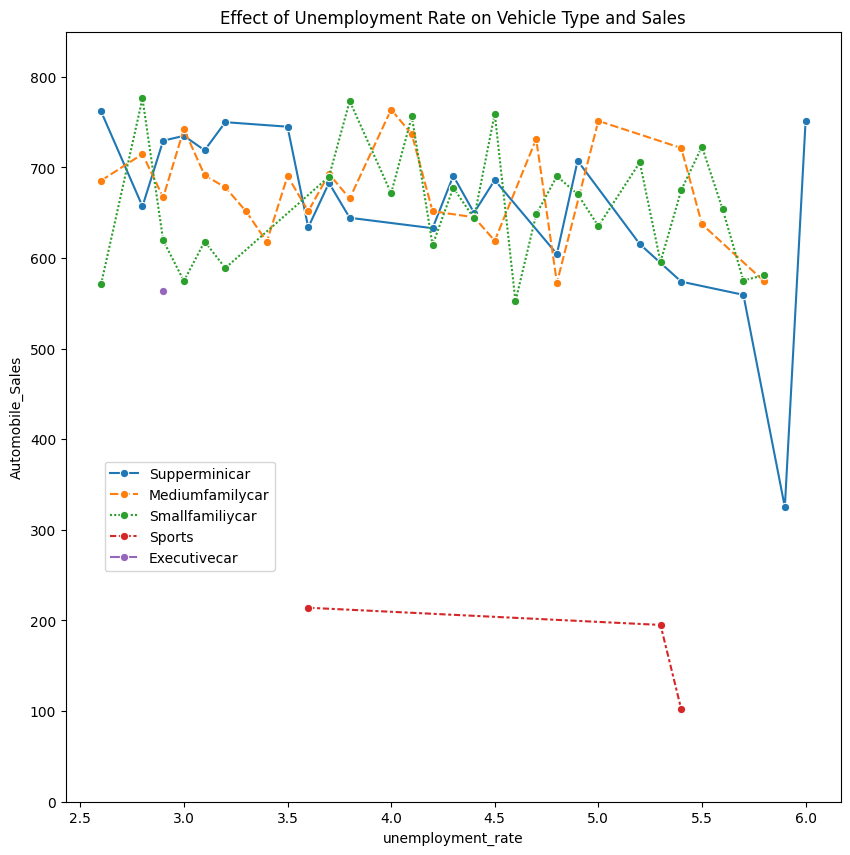

In [77]:
df_rec = df[df['Recession']==1]
plt.figure(figsize=(10,10))
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc=(0.05,.3))

In [76]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')